In [12]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import control
# from ipywidgets import interact

s = sym.symbols('s', complex=True)
k = sym.symbols('k', real=True)

$$G_1(s)=\frac{10}{s+5}$$

- Orden 1 porque el máximo exponente en denominador es uno.
- Tiene un polo en $s=-5$
- No tiene ceros

In [33]:
G1 = control.tf([10],[1,5,1])*control.tf([10],[1,1])
G1

TransferFunction(array([100]), array([1, 6, 6, 1]))

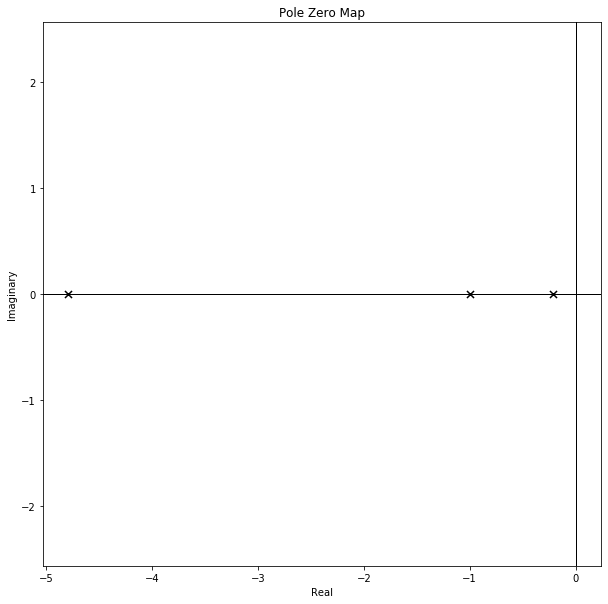

In [34]:
control.pzmap(G1);

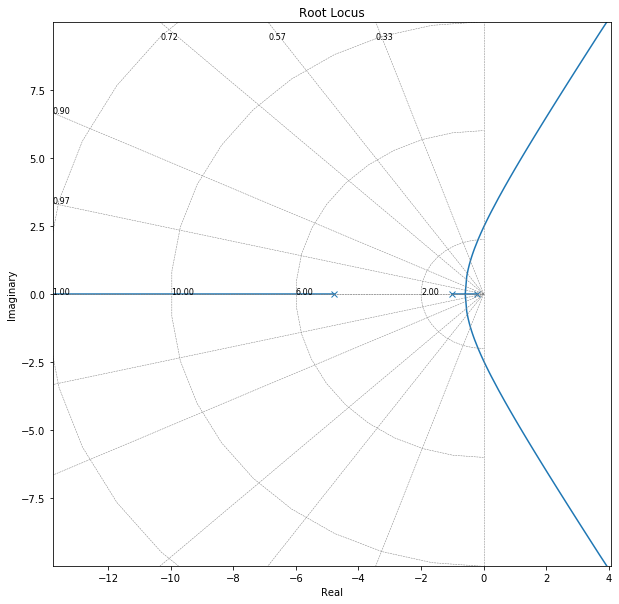

In [35]:
plt.rcParams["figure.figsize"] = (10,10)
control.rlocus(G1);

In [8]:
G1sym = 10/(s+5)
G1sym

10/(s + 5)

![figuras/bucle.png](C_Analogo/figuras/bucle.png)

In [13]:
FdTLCsym = k*G1sym/(1+k*G1sym)
FdTLCsym.simplify()

10*k/(10*k + s + 5)

- Polo en lazo cerrado en $s = -5-10k$
- Polo deseado para lazo cerrado en $s = -10$
- $ k = 0.5$

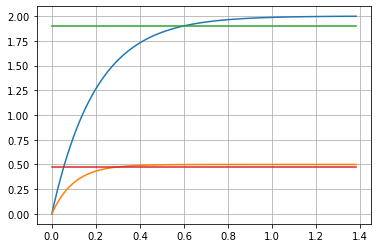

In [28]:
k = 0.5
t,yLA = control.step_response(G1);
_,yLC = control.step_response(control.feedback(k*G1,1),t)
plt.plot(t,yLA,t,yLC,
         [t[0],t[-1]],[2*0.95,2*0.95],
         [t[0],t[-1]],[0.5*0.95,0.5*0.95]);
plt.grid()
